# Trading Notebook
J Daniel Kim

Overall goal: Recently, there has been a rise of retail traders in the market. The purpose of this project is to create a easy to use equity trading service that helps take emotional decisions out of the factor. Also, I want to discover if my model could profit in the  2020.


MVP Goal:Fit baseline models such as ARIMA and VARIMAX.  Move onto fitting simple neural networks and LSTM's

Stretch Goal: Fit multivariate model, change trading strategy, use different stocks. 

Trading Strategy: Predicting if the closing price is higher than the opening. Long only strategy.

Evaluation metrics: Accuracy, Precision, RMSE, Percent return
Stocks (ROI): 
- S&P 500 Market Cap: AAPL, MSFT, GOOGL, AMZN, BRK-B, JPM, JNJ, PG
- Top 5 Volitile: LODE, UBX, CLUB, IDXG, KGJI
- Top 5 hand selected stocks: ISRG, GOOGL, TSLA, AAPL, AMZN

Models: Univariate Single Neural Network, Univariate LSTM, Multivariate LSTM

I have attached the Minimum Viable Project notebook on my github.

In [1]:
#importing packages
import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import requests
import pmdarima as pm
from statsmodels.tsa.api import VAR
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/

In [2]:
#Transforming income dataset
def Income_statement(df):
    df = df.T
    header = df.iloc[0]
    df.columns=header
    df.reset_index(inplace=True)
    df = df[2:]
    df['index'] = pd.to_datetime(df['index'],format = '%m/%d/%Y')
    df.set_index('index',inplace=True)
    columns=['EBIT', 'TotalRevenue','\tNetIncome']
    for i in columns:
        df[i] = df[i].str.replace(',', '')
    df = df[['EBIT', 'TotalRevenue','\tNetIncome']].astype(float)
    df.rename(columns={'\tNetIncome':'NetIncome'},inplace=True)
    return df.resample('D').ffill()['2005-01-01':]
    

In [3]:
#Transforming cashflow dataset
def cashflow_organize(df):
    df = df.T
    header = df.iloc[0]
    df.columns=header
    df.reset_index(inplace=True)
    df = df[2:]
    df['index'] = pd.to_datetime(df['index'],format = '%m/%d/%Y')
    df.set_index('index',inplace=True)
    columns=['FreeCashFlow','FinancingCashFlow','InvestingCashFlow','OperatingCashFlow']
    for i in columns:
        df[i] = df[i].str.replace(',', '')
    df = df[['FreeCashFlow','FinancingCashFlow','InvestingCashFlow','OperatingCashFlow']].astype(float)
    return df.resample('D').ffill()['2005-01-01':]

In [4]:
#Transforming financials
def cleaning_valuation(df):
    df = df.T
    header = df.iloc[0]
    df.columns=header
    df.reset_index(inplace=True)
    df = df[2:]
    df['index'] = pd.to_datetime(df['index'],format = '%m/%d/%Y')
    df.set_index('index',inplace=True)
    columns = ['MarketCap', 'PeRatio']
    changing = ['MarketCap',  'PeRatio']
    df.drop(columns=['EnterpriseValue','EnterprisesValueRevenueRatio','EnterprisesValueEBITDARatio','PsRatio', 'PbRatio', 'ForwardPeRatio', 'PegRatio'],inplace=True)
    for i in columns:
        df[i] = df[i].str.replace(',', '')
    for j in changing:
        df[j] = df[j].map(lambda x: float(x))
    return df.resample('D').ffill()['2005-01-01':]
    
        

In [5]:
#Transforming financials
def cleaning_valuation2(df):
    df = df.T
    header = df.iloc[0]
    df.columns=header
    df.reset_index(inplace=True)
    df = df[2:]
    df['index'] = pd.to_datetime(df['index'],format = '%m/%d/%Y')
    df.set_index('index',inplace=True)
    columns = ['MarketCap','PeRatio']
    changing = ['MarketCap', 'PeRatio']
    df.drop(columns=['EnterpriseValue', 'EnterprisesValueRevenueRatio','PsRatio', 'PbRatio', 'ForwardPeRatio', 'PegRatio'],inplace=True)
    for i in columns:
        df[i] = df[i].str.replace(',', '')
    for j in changing:
        df[j] = df[j].map(lambda x: float(x))
    return df.resample('D').ffill()['2005-01-01':]
    
        

In [6]:
#Transforming financials
def cleaning_valuation3(df):
    df = df.T
    header = df.iloc[0]
    df.columns=header
    df.reset_index(inplace=True)
    df = df[2:]
    df['index'] = pd.to_datetime(df['index'],format = '%m/%d/%Y')
    df.set_index('index',inplace=True)
    columns = ['MarketCap','PeRatio']
    changing = ['MarketCap', 'PeRatio']
    df.drop(columns=['PsRatio', 'PbRatio', 'ForwardPeRatio', 'PegRatio'],inplace=True)
    for i in columns:
        df[i] = df[i].str.replace(',', '')
    for j in changing:
        df[j] = df[j].map(lambda x: float(x))
    return df.resample('D').ffill()['2005-01-01':]
    
        

In [7]:
#Helping rename columns
def column_names(x):
    x.rename(columns={0:'Open', 1:'High', 2:'Low', 3:'Close', 4:'Volume', 5:'Dividends', 6:'MarketCap',
       7:'PeRatio', 8:'EBIT', 9:'TotalRevenue', 10:'NetIncome', 11:'FreeCashFlow',
       12:'FinancingCashFlow', 13:'InvestingCashFlow', 14:'OperatingCashFlow', 15:'mean'},inplace=True)
    return x

In [8]:
#Importing and scaling vix data
vix = pd.read_csv('vixcurrent.csv',header=1)
vix['mean'] = (vix['VIX High'] + vix['VIX Low'])/2
vix['Date'] = pd.to_datetime(vix['Date'], format="%m/%d/%Y")
vix.set_index('Date',inplace=True)
vix['mean']=vix['mean'].map(lambda x:-x)
vix = vix.ffill()
vix_mean = pd.DataFrame(vix['mean'])['2005-01-01':]

In [9]:
#Microsoft
MSFT_valuation = cleaning_valuation(pd.read_csv('MSFT/MSFT_monthly_valuation_measures.csv'))
MSFT_income_statement = Income_statement(pd.read_csv('MSFT/MSFT_quarterly_financials.csv'))
MSFT_cashflow = cashflow_organize(pd.read_csv('MSFT/MSFT_quarterly_cash-flow.csv'))
#APPLE
AAPL_valuation = cleaning_valuation(pd.read_csv('AAPL/AAPL_monthly_valuation_measures.csv'))
AAPL_cashflow = cashflow_organize(pd.read_csv('AAPL/AAPL_quarterly_cash-flow.csv'))
AAPL_income_statement = Income_statement(pd.read_csv('MSFT/MSFT_quarterly_financials.csv'))

#Amazon does not have dividends
AMZN_valuation = cleaning_valuation(pd.read_csv('AMZN/AMZN_monthly_valuation_measures.csv'))
AMZN_cashflow = cashflow_organize(pd.read_csv('AMZN/AMZN_quarterly_cash-flow.csv'))
AMZN_income_statement = Income_statement(pd.read_csv('AMZN/AMZN_quarterly_financials.csv'))

#JNJ
JNJ_valuation = cleaning_valuation(pd.read_csv('JNJ/JNJ_monthly_valuation_measures.csv'))
JNJ_cashflow = cashflow_organize(pd.read_csv('JNJ/JNJ_quarterly_cash-flow.csv'))
JNJ_income_statement = Income_statement(pd.read_csv('JNJ/JNJ_quarterly_financials.csv'))

#Berkshire Hathway does not have dividends 
BRK_B_valuation = cleaning_valuation2(pd.read_csv('BRK-B/BRK-B_monthly_valuation_measures.csv'))
BRK_B_cashflow = cashflow_organize(pd.read_csv('BRK-B/BRK-B_quarterly_cash-flow.csv'))
BRK_B_income_statement = Income_statement(pd.read_csv('BRK-B/BRK-B_quarterly_financials.csv'))

#Berkshire Hathway does not have dividends
GOOGL_valuation = cleaning_valuation(pd.read_csv('GOOGL/GOOGL_monthly_valuation_measures.csv'))
GOOGL_cashflow = cashflow_organize(pd.read_csv('GOOGL/GOOGL_quarterly_cash-flow.csv'))
GOOGL_income_statement = Income_statement(pd.read_csv('GOOGL/GOOGL_quarterly_financials.csv'))

#JP Morgan
JPM_valuation = cleaning_valuation3(pd.read_csv('JPM/JPM_monthly_valuation_measures.csv'))
JPM_cashflow = cashflow_organize(pd.read_csv('JPM/JP_quarterly_cash-flow.csv'))
JPM_income_statement = Income_statement(pd.read_csv('JPM/JP_quarterly_financials.csv'))

#Proctor and gamble 
PG_valuation = cleaning_valuation(pd.read_csv('PG/PG_monthly_valuation_measures.csv'))
PG_cashflow = cashflow_organize(pd.read_csv('PG/PG_quarterly_cash-flow.csv'))
PG_income_statement = Income_statement(pd.read_csv('PG/PG_quarterly_financials.csv'))


In [10]:
#Transforming stock data
def yfinance_import(x):
    stock = yf.Ticker(x)
    hist = stock.history(period='max')
    hist.reset_index(inplace=True)
    hist['Date'] = pd.to_datetime(hist['Date'])
    hist.set_index('Date',inplace=True)
    return hist

In [11]:
#importing financial info
import yfinance as yf
AAPL = yfinance_import('AAPL').resample('D').ffill()['2005-01-01':] 
MSFT = yfinance_import('MSFT').resample('D').ffill()['2005-01-01':]
AMZN = yfinance_import('AMZN').resample('D').ffill()['2005-01-01':]
JNJ = yfinance_import('JNJ').resample('D').ffill()['2005-01-01':]
GOOGL = yfinance_import('GOOGL').resample('D').ffill()['2005-01-01':]
JPM = yfinance_import('JPM').resample('D').ffill()['2005-01-01':]
PG = yfinance_import('PG').resample('D').ffill()['2005-01-01':]
BRK_B = yfinance_import('BRK-B').resample('D').ffill()['2005-01-01':]
VEEV = yfinance_import('VEEV').resample('D').ffill()['2005-01-01':]

#Top 5 volitile stocks
UBX = yfinance_import('UBX').resample('D').ffill()['2018-05-03':]
LODE = yfinance_import('LODE').resample('D').ffill()['2010-07-21':]
CLUB= yfinance_import('CLUB').resample('D').ffill()['2006-06-02':]
IDXG= yfinance_import('IDXG').resample('D').ffill()['2005-01-01':]
KGJI = yfinance_import('KGJI').resample('D').ffill()['2005-01-01':]


In [12]:
#dropping stock splits
AAPL.drop('Stock Splits',axis=1, inplace=True)
MSFT.drop('Stock Splits',axis=1, inplace=True)
AMZN.drop('Stock Splits',axis=1, inplace=True)
JNJ.drop('Stock Splits',axis=1, inplace=True)
GOOGL.drop('Stock Splits',axis=1, inplace=True)
JPM.drop('Stock Splits',axis=1, inplace=True)
PG.drop('Stock Splits',axis=1, inplace=True)
BRK_B.drop('Stock Splits',axis=1, inplace=True)


In [13]:
#Concating all info
AAPL_concat = pd.concat([AAPL,AAPL_valuation,AAPL_income_statement,AAPL_cashflow,vix_mean],axis=1)
MSFT_concat = pd.concat([MSFT,MSFT_valuation,MSFT_income_statement,MSFT_cashflow,vix_mean],axis=1)
AMZN_concat = pd.concat([AMZN,AMZN_valuation,AMZN_income_statement,AMZN_cashflow,vix_mean],axis=1)
JNJ_concat = pd.concat([JNJ,JNJ_valuation,JNJ_income_statement,JNJ_cashflow,vix_mean],axis=1)
GOOGL_concat = pd.concat([GOOGL,GOOGL_valuation,GOOGL_income_statement,GOOGL_cashflow,vix_mean],axis=1)
JPM_concat = pd.concat([JPM,JPM_valuation,JPM_income_statement,JPM_cashflow,vix_mean],axis=1)
PG_concat = pd.concat([PG,PG_valuation,PG_income_statement,PG_cashflow,vix_mean],axis=1)
BRK_B_concat = pd.concat([BRK_B,BRK_B_valuation,BRK_B_income_statement,BRK_B_cashflow,vix_mean],axis=1)


In [14]:
#Imputing values using InterpolateTime
def imputing_values(valuation,columns):
    import numpy as np
    for z in columns:
        valuation = valuation.assign(InterpolateTime=valuation[z].interpolate(method='time'))
        valuation[z]=valuation['InterpolateTime']
    valuation.drop('InterpolateTime',axis=1,inplace=True)
    return valuation.ffill()

In [15]:
#Imputing values
columns =['MarketCap', 'PeRatio','EBIT', 'TotalRevenue','NetIncome']
AAPL_concat = imputing_values(AAPL_concat,columns)['2005-01-01':]
MSFT_concat = imputing_values(MSFT_concat,columns)['2005-01-01':]
AMZN_concat = imputing_values(AMZN_concat,columns)['2005-01-01':]
JNJ_concat = imputing_values(JNJ_concat,columns)['2005-01-01':]
# V_concat = imputing_values(V_concat,columns)['2008-03-19':]
# FB_concat = imputing_values(FB_concat,columns)['2012-05-18':]
GOOGL_concat = imputing_values(GOOGL_concat,columns)['2005-01-01':]
JPM_concat = imputing_values(JPM_concat,columns)['2005-01-01':]
PG_concat = imputing_values(PG_concat,columns)['2005-01-01':]
BRK_B_concat = imputing_values(BRK_B_concat,columns)['2005-01-01':]

In [21]:
#scaled data and renaming columns
from sklearn.preprocessing import MinMaxScaler
min_max_scaler= MinMaxScaler()
AAPL_scaled = column_names(pd.DataFrame(min_max_scaler.fit_transform(AAPL_concat)))
MSFT_scaled = column_names(pd.DataFrame(min_max_scaler.fit_transform(MSFT_concat)))
AMZN_scaled = column_names(pd.DataFrame(min_max_scaler.fit_transform(AMZN_concat)))
JNJ_scaled = column_names(pd.DataFrame(min_max_scaler.fit_transform(JNJ_concat)))
GOOGL_scaled = column_names(pd.DataFrame(min_max_scaler.fit_transform(GOOGL_concat)))
JPM_scaled = column_names(pd.DataFrame(min_max_scaler.fit_transform(JPM_concat)))
PG_scaled = column_names(pd.DataFrame(min_max_scaler.fit_transform(PG_concat)))
BRK_B_scaled = column_names(pd.DataFrame(min_max_scaler.fit_transform(BRK_B_concat)))


In [22]:
def percent_change(name):
    stock_concat_drop = name.reset_index()
    stock_concat_drop = stock_concat_drop.drop('Date',axis=1)
    stock_concat_pctchange = stock_concat_drop.pct_change()
    stock_concat_pctchange = stock_concat_pctchange[['Open', 'High', 'Low', 'Close', 'Volume', 'MarketCap',
       'PeRatio', 'EBIT', 'TotalRevenue', 'NetIncome', 'FreeCashFlow',
       'FinancingCashFlow', 'InvestingCashFlow', 'OperatingCashFlow']]
    stock_concat_pctchange.fillna(0,inplace=True)
    stock_concat_pctchange.reset_index(inplace=True)
    stock_concat_pctchange.drop('index',axis=1,inplace=True)
    return stock_concat_pctchange

In [24]:
AAPL_concat_drop = AAPL_concat.reset_index()
AAPL_concat_drop = AAPL_concat_drop.drop('Date',axis=1)#.pct_change()
AAPL_concat_pctchange = AAPL_concat_drop.pct_change()
AAPL_concat_pctchange = AAPL_concat_pctchange[['Open', 'High', 'Low', 'Close', 'Volume', 'MarketCap',
       'PeRatio', 'EBIT', 'TotalRevenue', 'NetIncome', 'FreeCashFlow',
       'FinancingCashFlow', 'InvestingCashFlow', 'OperatingCashFlow']]
AAPL_concat_pctchange.fillna(0,inplace=True)
AAPL_concat_pctchange.reset_index(inplace=True)
AAPL_concat_pctchange.drop('index',axis=1,inplace=True)

## EDA

#### Imputing

In the world of finance, the three financial statements release quartely or in their 8-k, which can be random. From this, we can help create our valuation metrics. However, as you can see in the plot below, that the reporting has missing values therefore not being to make the P/E ratio.

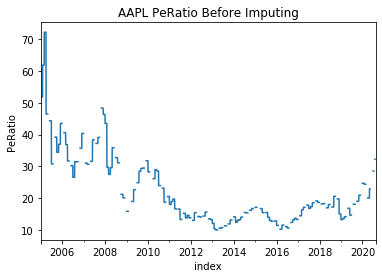

In [25]:
AAPL_valuation['PeRatio'].plot()
plt.title('AAPL PeRatio Before Imputing')
plt.ylabel('PeRatio')
plt.savefig('AAPL_PeRatio_Before_Imputing.png');

I have created a transformation that imputes the values using the Interpolate time method. This helps connect the dots. Below is an example after the imputing.

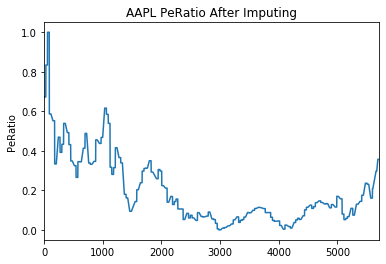

In [26]:
AAPL_scaled['PeRatio'].plot()
plt.title('AAPL PeRatio After Imputing')
plt.ylabel('PeRatio')
plt.savefig('AAPL_PeRatio_After_Imputing.png');

Here is another example of Microsoft. (First before and second after) 

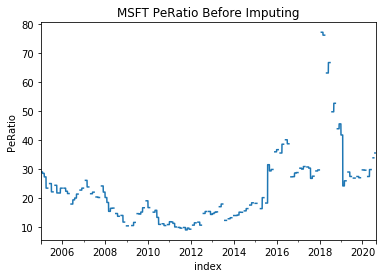

In [27]:
MSFT_valuation['PeRatio'].plot()
plt.title('MSFT PeRatio Before Imputing')
plt.ylabel('PeRatio')
plt.savefig('MSFT_PeRatio_Before_Imputing.png');

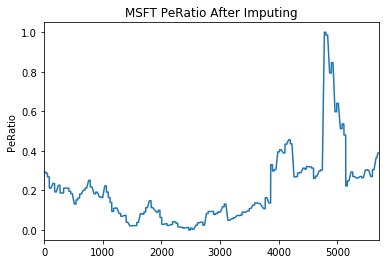

In [28]:
MSFT_scaled['PeRatio'].plot()
plt.title('MSFT PeRatio After Imputing')
plt.ylabel('PeRatio')
plt.savefig('MSFT_PeRatio_After_Imputing.png');

#### Heatmap Correlation

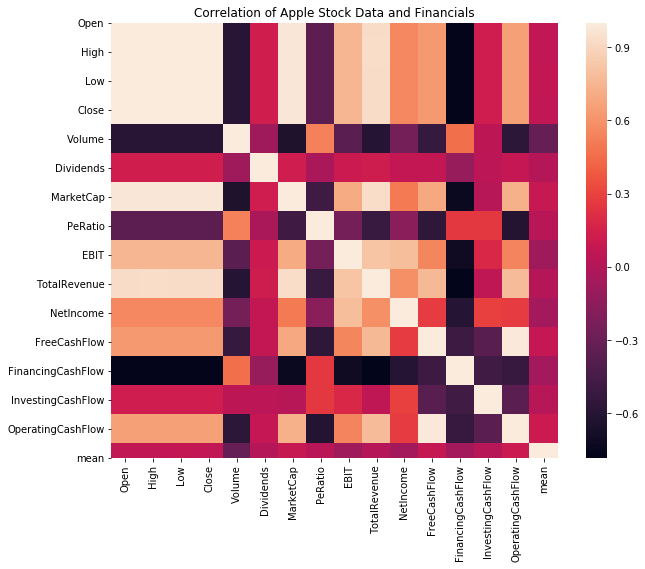

<Figure size 432x288 with 0 Axes>

In [29]:
data= AAPL_concat
fmapping, heatmapping = plt.subplots(figsize=(10, 8))
heatmapping= sns.heatmap(data.corr(), square=False)
heatmapping.set(title='Correlation of Apple Stock Data and Financials')
plt.show()
plt.savefig('Correlation_of_Apple_Stock_Data_and_Financials.png');

From this we can see that the stock data is highly correlated amongst each other as well as Total Revenue.

#### Looking at important dates and triggers of the market 2020

Dates:
- 2020-03-23: S&P hit their lowest point
- 2020-03-27: Stimulus package
- 2020-05-23: Memorial Day Weekend
- 2020-07-04: July 4th


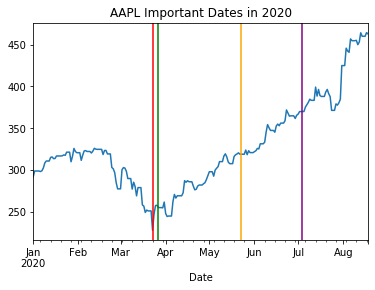

In [30]:
#APPLE
AAPL_concat['High']['2020-01-01':].plot()
plt.axvline('2020-03-23',color='red')
plt.axvline('2020-03-27',color='green')
plt.axvline('2020-07-04',color='purple')
plt.axvline('2020-05-23',color='orange')
plt.title('AAPL Important Dates in 2020')
plt.savefig('AAPL_Important_Dates_in_2020.png');

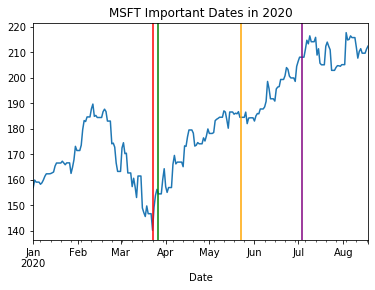

In [31]:
#Microsoft
MSFT_concat['High']['2020-01-01':].plot()
plt.axvline('2020-03-23',color='red')
plt.axvline('2020-03-27',color='green')
plt.axvline('2020-07-04',color='purple')
plt.axvline('2020-05-23',color='orange')
plt.title('MSFT Important Dates in 2020')
plt.savefig('MSFT_Important_Dates_in_2020.png');

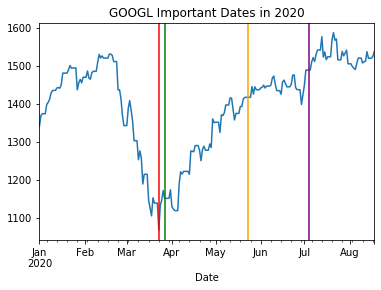

In [32]:
#GOOGLE
GOOGL_concat['High']['2020-01-01':].plot()
plt.axvline('2020-03-23',color='red')
plt.axvline('2020-03-27',color='green')
plt.axvline('2020-07-04',color='purple')
plt.axvline('2020-05-23',color='orange')
plt.title('GOOGL Important Dates in 2020')
plt.savefig('GOOGL_Important_Dates_in_2020.png');

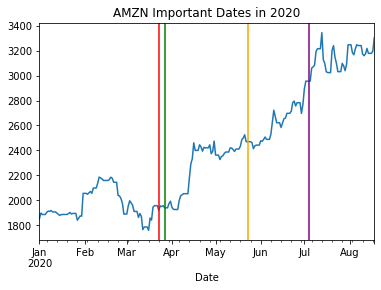

In [33]:
#Amazon 
AMZN_concat['High']['2020-01-01':].plot()
plt.axvline('2020-03-23',color='red')
plt.axvline('2020-03-27',color='green')
plt.axvline('2020-07-04',color='purple')
plt.axvline('2020-05-23',color='orange')
plt.title('AMZN Important Dates in 2020')
plt.savefig('AMZN_Important_Dates_in_2020.png');

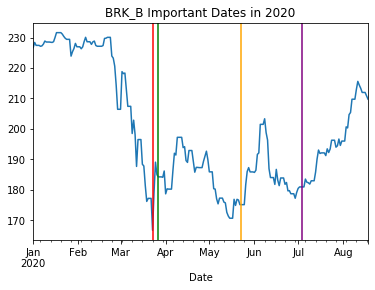

In [35]:
#Berkshire Hathaway
BRK_B_concat['High']['2020-01-01':].plot()
plt.axvline('2020-03-23',color='red')
plt.axvline('2020-03-27',color='green')
plt.axvline('2020-07-04',color='purple')
plt.axvline('2020-05-23',color='orange')
plt.title('BRK_B Important Dates in 2020')
plt.savefig('BRK_B_Important_Dates_in_2020.png');

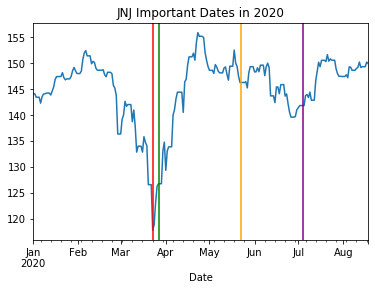

In [36]:
#Johnson and Johnson
JNJ_concat['High']['2020-01-01':].plot()
plt.axvline('2020-03-23',color='red')
plt.axvline('2020-03-27',color='green')
plt.axvline('2020-07-04',color='purple')
plt.axvline('2020-05-23',color='orange')
plt.title('JNJ Important Dates in 2020');

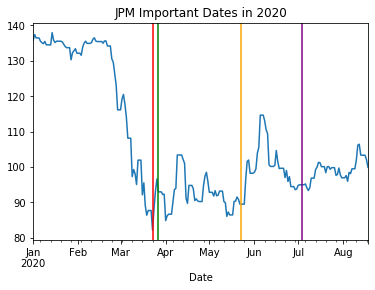

In [37]:
#JP. Morgan
JPM_concat['High']['2020-01-01':].plot()
plt.axvline('2020-03-23',color='red')
plt.axvline('2020-03-27',color='green')
plt.axvline('2020-07-04',color='purple')
plt.axvline('2020-05-23',color='orange')
plt.title('JPM Important Dates in 2020')
plt.savefig('JPM_Important_Dates_in_2020.png');

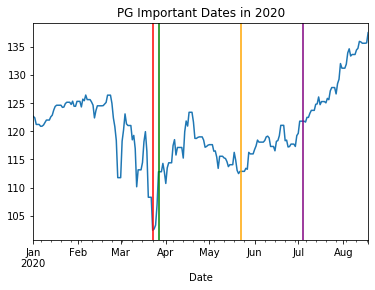

In [39]:
#Proctor and Gamble
PG_concat['High']['2020-01-01':].plot()
plt.axvline('2020-03-23',color='red')
plt.axvline('2020-03-27',color='green')
plt.axvline('2020-07-04',color='purple')
plt.axvline('2020-05-23',color='orange')
plt.title('PG Important Dates in 2020')
plt.savefig('PG_Important_Dates_in_2020.png');

## Univariate single layer Neural network linear regression 


In [40]:
#Function for plotting series
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [41]:
#Sliding windows and data transformation
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [42]:
def univariate_single_layer_Neural_Network(company,splittime):
    time = np.arange(len(company), dtype="float32")
    series_close =company['Close']
    series_open =company['Open']
    x_train_close  = np.array(company['Close'][:splittime])
    x_train_open  = np.array(company['Open'][:splittime])
    time_train = time[:splittime]
    x_valid_close  = np.array(company['Close'][splittime:])
    x_valid_open  = np.array(company['Open'][splittime:])
    time_valid = time[splittime:]
    split_time =splittime
    window_size = 2
    batch_size = 34
    shuffle_buffer_size = len(company)
    split_time = splittime
    #Fitting model
    dataset_close = windowed_dataset(x_train_close, window_size, batch_size, shuffle_buffer_size)
    model_close = tf.keras.models.Sequential([tf.keras.layers.Dense(1, input_shape=[window_size])])
    # model_close.add(tf.keras.layers.Dropout(0.2))
    model_close.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-7, momentum=0.9))
    model_close.fit(dataset_close,epochs=100,verbose=0)
    #Fitting model
    dataset_open = windowed_dataset(x_train_open, window_size, batch_size, shuffle_buffer_size)
    model_open = tf.keras.models.Sequential([tf.keras.layers.Dense(1, input_shape=[window_size])])
    model_open.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-7, momentum=0.9))
    model_open.fit(dataset_close,epochs=100,verbose=0)
    #Forcasting
    forecast_close = []
    for time in range(len(series_close) - window_size):
        forecast_close.append(model_close.predict(np.array(series_close[time:time + window_size])[np.newaxis]))
    forecast_close = forecast_close[split_time-window_size:]
    results_close = np.array(forecast_close)[:, 0, 0]
    #Forcasting
    forecast_open = []
    for time in range(len(series_open) - window_size):
        forecast_open.append(model_open.predict(np.array(series_open[time:time + window_size])[np.newaxis]))
    forecast_open = forecast_open[split_time-window_size:]
    results_open = np.array(forecast_open)[:, 0, 0]
    predicted_open = pd.DataFrame(results_open)
    predicted_open.rename(columns={0:'open_predicted'},inplace=True)
    predicted_close = pd.DataFrame(results_close)
    predicted_close.rename(columns={0:'close_predicted'},inplace=True)
    valid_open = pd.DataFrame(x_valid_open)
    valid_open.rename(columns={0:'open_valid'},inplace=True)
    valid_close = pd.DataFrame(x_valid_close)
    valid_close.rename(columns={0:'close_valid'},inplace=True)
    open_close_concat = pd.concat([valid_open,valid_close,predicted_open,predicted_close],axis=1)
    Long = open_close_concat[open_close_concat['open_predicted']<open_close_concat['close_predicted']]
    Long['difference_valid'] = Long['close_valid']-Long['open_valid']
    Long['difference_predicted']=Long['close_predicted']-Long['open_predicted']
    open_close_concat['difference_valid'] = open_close_concat['close_valid']- open_close_concat['open_valid']
    open_close_concat['binary_valid']= open_close_concat['difference_valid'].map(lambda x: 1 if x>0 else 0)
    open_close_concat['difference_predicted'] = open_close_concat['close_predicted']- open_close_concat['open_predicted']
    open_close_concat['binary_predicted']= open_close_concat['difference_predicted'].map(lambda x: 1 if x>0 else 0)
    from sklearn.metrics import precision_score
    from sklearn.metrics import accuracy_score
    accuracy = accuracy_score(open_close_concat['binary_valid'],open_close_concat['binary_predicted'])
    precision= precision_score(open_close_concat['binary_valid'],open_close_concat['binary_predicted'])
    from sklearn.metrics import mean_squared_error
    rmse = np.sqrt(mean_squared_error(Long['difference_valid'],Long['difference_predicted']))
    return sum(Long['difference_valid']), accuracy, precision, rmse
    
    
    

In [130]:
sum_AAPL, accuracy_AAPL, precision_AAPL, RMSE_AAPL =univariate_single_layer_Neural_Network(AAPL,5478)
print('Accuracy:', accuracy_AAPL)
print('Precision:', precision_AAPL)
print('Total Profit',sum_AAPL)
print('RMSE',RMSE_AAPL )

Accuracy: 0.5844155844155844
Precision: 0.631578947368421
Total Profit 183.92999999999998
RMSE 9.166888127715016


/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [131]:
sum_MSFT, accuracy_MSFT, precision_MSFT, RMSE_MSFT =univariate_single_layer_Neural_Network(MSFT,5478)
print('Accuracy:', accuracy_MSFT)
print('Precision:', precision_MSFT)
print('Total Profit',sum_MSFT)
print('RMSE',RMSE_MSFT )

Accuracy: 0.5627705627705628
Precision: 0.576271186440678
Total Profit 27.20999999999995
RMSE 5.658833650213059


/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [132]:
sum_AMZN, accuracy_AMZN, precision_AMZN, RMSE_AMZN =univariate_single_layer_Neural_Network(AMZN,5478)
print('Accuracy:', accuracy_AMZN)
print('Precision:', precision_AMZN)
print('Total Profit',sum_AMZN)
print('RMSE',RMSE_AMZN)

Accuracy: 0.6190476190476191
Precision: 0.5897435897435898
Total Profit 823.73
RMSE 53.86282017027765


/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [133]:
sum_BRK_B, accuracy_BRK_B, precision_BRK_B, RMSE_BRK_B =univariate_single_layer_Neural_Network(BRK_B,5478)
print('Accuracy:', accuracy_BRK_B)
print('Precision:', precision_BRK_B)
print('Total Profit',sum_BRK_B)
print('RMSE',RMSE_BRK_B)

Accuracy: 0.6493506493506493
Precision: 0.6548672566371682
Total Profit 81.89000000000021
RMSE 3.015962716589329


/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [134]:
sum_GOOGL, accuracy_GOOGL, precision_GOOGL,RMSE_GOOGL =univariate_single_layer_Neural_Network(GOOGL,5478)
print('Accuracy:', accuracy_GOOGL)
print('Precision:', precision_GOOGL)
print('Total Profit',sum_GOOGL)
print('RMSE',RMSE_GOOGL)

Accuracy: 0.5714285714285714
Precision: 0.6296296296296297
Total Profit 559.0999999999988
RMSE 31.059019932933982


/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [135]:
sum_JNJ, accuracy_JNJ, precision_JNJ, RMSE_JNJ =univariate_single_layer_Neural_Network(JNJ,5478)
print('Accuracy:', accuracy_JNJ)
print('Precision:', precision_JNJ)
print('Total Profit',sum_JNJ)
print('RMSE',RMSE_JNJ)

Accuracy: 0.683982683982684
Precision: 0.6666666666666666
Total Profit 62.44000000000001
RMSE 2.534472926648598


/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [136]:
sum_JPM, accuracy_JPM, precision_JPM, RMSE_JPM=univariate_single_layer_Neural_Network(JPM,5478)
print('Accuracy:', accuracy_JPM)
print('Precision:', precision_JPM)
print('Total Profit',sum_JPM)
print('RMSE',RMSE_JPM)

Accuracy: 0.5714285714285714
Precision: 0.4731182795698925
Total Profit 10.59999999999971
RMSE 2.8178322006531107


/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [137]:
sum_PG, accuracy_PG, precision_PG, RMSE_PG =univariate_single_layer_Neural_Network(PG,5478)
print('Accuracy:', accuracy_PG)
print('Precision:', precision_PG)
print('Total Profit',sum_PG)
print('RMSE',RMSE_PG)

Accuracy: 0.6103896103896104
Precision: 0.6641221374045801
Total Profit 72.65999999999981
RMSE 2.685556151697838


/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [138]:
companies = [AAPL,MSFT,AMZN,PG,JNJ,JPM,BRK_B,GOOGL]

In [139]:
count_high=0
for i in companies:
    count_high+= max(i['High'])
count_high 

6276.35

In [140]:
summing=[sum_PG,sum_JPM,sum_JNJ,sum_GOOGL,sum_BRK_B,sum_AMZN,sum_MSFT,sum_AAPL]
sums=0
for i in summing:
    sums+= i
sums 


1821.5599999999988

In [141]:
percent = (sums/count_high)*100

In [142]:
print('If you put in', round(count_high,2), 'dollars you will have a return of', round(sums,2),', which is a',  round(percent,2),'% return in 2020 so far.')

If you put in 6276.35 dollars you will have a return of 1821.56 , which is a 29.02 % return in 2020 so far.


Average accuracy is 0.61, average precision is 0.611, and total rmse is 110.84.

# Top 5 volitile stocks Univariate Single NN

In [56]:
#Top 5 volitile stocks
UBX = yfinance_import('UBX').resample('D').ffill()['2018-05-03':]
LODE = yfinance_import('LODE').resample('D').ffill()['2010-07-21':]
CLUB= yfinance_import('CLUB').resample('D').ffill()['2006-06-02':]
IDXG= yfinance_import('IDXG').resample('D').ffill()['2005-01-01':]
KGJI = yfinance_import('KGJI').resample('D').ffill()['2005-01-01':]

In [57]:
sum_LODE, accuracy_LODE, precision_LODE, RMSE_LODE =univariate_single_layer_Neural_Network(LODE, 3451)
print('Accuracy:', accuracy_LODE)
print('Precision:', precision_LODE)
print('Total Profit',sum_LODE)
print('RMSE',RMSE_LODE)

Accuracy: 0.48484848484848486
Precision: 0.40816326530612246
Total Profit 0.20000000000000062
RMSE 0.12247197935713885


/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [58]:
sum_UBX, accuracy_UBX, precision_UBX, RMSE_UBX =univariate_single_layer_Neural_Network(UBX,608)
print('Accuracy:', accuracy_UBX)
print('Precision:', precision_UBX)
print('Total Profit',sum_UBX)
print('RMSE',RMSE_UBX)

Accuracy: 0.45454545454545453
Precision: 0.45454545454545453
Total Profit -7.454999999999999
RMSE 3.4566552900286087


In [59]:
sum_CLUB, accuracy_CLUB, precision_CLUB, RMSE_CLUB =univariate_single_layer_Neural_Network(CLUB,4961)
print('Accuracy:', accuracy_CLUB)
print('Precision:', precision_CLUB)
print('Total Profit',sum_CLUB)
print('RMSE',RMSE_CLUB)

Accuracy: 0.6363636363636364
Precision: 0.45918367346938777
Total Profit 3.2311000000000014
RMSE 0.15713953153860966


/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [60]:
sum_IDXG, accuracy_IDXG, precision_IDXG, RMSE_IDXG =univariate_single_layer_Neural_Network(IDXG,5478)
print('Accuracy:', accuracy_IDXG)
print('Precision:', precision_IDXG)
print('Total Profit',sum_IDXG)
print('RMSE',RMSE_IDXG)

Accuracy: 0.658008658008658
Precision: 0.6153846153846154
Total Profit 8.599999999999994
RMSE 0.40411414134977286


/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [61]:
sum_KGJI, accuracy_KGJI, precision_KGJI, RMSE_KGJI =univariate_single_layer_Neural_Network(KGJI,5478)
print('Accuracy:', accuracy_KGJI)
print('Precision:', precision_KGJI)
print('Total Profit',sum_KGJI)
print('RMSE',RMSE_KGJI)

Accuracy: 0.38961038961038963
Precision: 0.38961038961038963
Total Profit -3.404200000000003
RMSE 1.102232487259265


In [62]:
summing=[sum_LODE,sum_UBX,sum_CLUB,sum_IDXG,sum_KGJI]
sums=0
for i in summing:
    sums+= i
sums 


1.1718999999999937

In [63]:
companying=[LODE,UBX,CLUB,IDXG,KGJI]

In [64]:
count_high=0
for i in companying:
    count_high+= max(i['High'])
count_high 

2412.2704

In [65]:
percent = (sums/count_high)*100

In [66]:
print('If you put in', round(count_high,2), 'dollars you will have a return of', round(sums,2),', which is a',  round(percent,2),'% return in 2020 so far.')

If you put in 2412.27 dollars you will have a return of 1.17 , which is a 0.05 % return in 2020 so far.


Average accuracy is 0.525, average precision is 0.465, and total rmse is 5.24.

## Top 5 Hand Selected Stocks Single Layer Neural Network

In [67]:
TSLA = yfinance_import('TSLA').resample('D').ffill()['2005-01-01':]
ISRG = yfinance_import('ISRG').resample('D').ffill()['2005-01-01':]

In [68]:
sum_TSLA, accuracy_TSLA, precision_TSLA, RMSE_TSLA =univariate_single_layer_Neural_Network(TSLA,3473)
print('Accuracy:', accuracy_TSLA)
print('Precision:', precision_TSLA)
print('Total Profit',sum_TSLA)
print('RMSE',RMSE_TSLA)

Accuracy: 0.6363636363636364
Precision: 0.6296296296296297
Total Profit 496.1099999999992
RMSE 49.68797928623631


/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [69]:
sum_ISRG, accuracy_ISRG, precision_ISRG, RMSE_ISRG =univariate_single_layer_Neural_Network(ISRG,5478)
print('Accuracy:', accuracy_ISRG)
print('Precision:', precision_ISRG)
print('Total Profit',sum_ISRG)
print('RMSE',RMSE_ISRG)

Accuracy: 0.6017316017316018
Precision: 0.5775862068965517
Total Profit 369.46000000000015
RMSE 11.826001858034955


/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [70]:
sum_GOOGL, accuracy_GOOGL, precision_GOOGL, RMSE_GOOGL =univariate_single_layer_Neural_Network(GOOGL,5478)
print('Accuracy:', accuracy_GOOGL)
print('Precision:', precision_GOOGL)
print('Total Profit',sum_GOOGL)
print('RMSE',RMSE_GOOGL)


Accuracy: 0.5930735930735931
Precision: 0.6240601503759399
Total Profit 651.5499999999984
RMSE 31.711804900153357


/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [71]:
sum_AMZN, accuracy_AMZN, precision_AMZN, RMSE_AMZN =univariate_single_layer_Neural_Network(AMZN,5478)
print('Accuracy:', accuracy_AMZN)
print('Precision:', precision_AMZN)
print('Total Profit',sum_AMZN)
print('RMSE',RMSE_AMZN)

Accuracy: 0.6103896103896104
Precision: 0.584070796460177
Total Profit 656.73
RMSE 57.288052457103575


/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [72]:
sum_AAPL, accuracy_AAPL, precision_AAPL, RMSE_AAPL =univariate_single_layer_Neural_Network(AAPL,5478)
print('Accuracy:', accuracy_AAPL)
print('Precision:', precision_AAPL)
print('Total Profit',sum_AAPL)
print('RMSE',RMSE_AAPL)


Accuracy: 0.5930735930735931
Precision: 0.6390977443609023
Total Profit 181.94999999999996
RMSE 6.870582131782485


/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/jdanielkim123/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [73]:
summing=[sum_TSLA,sum_ISRG,sum_GOOGL,sum_AMZN,sum_AAPL]
sums=0
for i in summing:
    sums+= i
sums 


2355.7999999999975

In [74]:
companying=[AMZN, AAPL, GOOGL, TSLA, ISRG]

In [75]:
count_high=0
for i in companying:
    count_high+= max(i['High'])
count_high 

8023.5599999999995

In [76]:
percent = (sums/count_high)*100

In [77]:
print('If you put in', round(count_high,2), 'dollars you will have a return of', round(sums,2),', which is a',  round(percent,2),'% return in 2020 so far.')

If you put in 8023.56 dollars you will have a return of 2355.8 , which is a 29.36 % return in 2020 so far.


Average accuracy is 0.607, average precision is 0.611, total rmse is 157.4

## Univariate LSTM Time series model 

In [78]:
#Transforming dataset 
def creat_dataset(X,y,time_steps=1):
    Xs, ys =[],[]
    for i in range(len(X)-time_steps):
        v=X.iloc[i:(i+time_steps)].to_numpy()
        Xs.append(v)
        ys.append(y.iloc[i+time_steps])
    return np.array(Xs), np.array(ys)

In [79]:
def univariate_lstm_model(company,starttime,splittime):
    company2 = -(company - company['High'].max())/(company['High'].max()-company['Low'].min())
    x_train_close  = pd.DataFrame(company2['Close'][starttime:splittime])
    x_train_open  = pd.DataFrame(company2['Open'][starttime:splittime])
    x_valid_close  = pd.DataFrame(company2['Close'][splittime:])
    x_valid_open  = pd.DataFrame(company2['Open'][splittime:])
#     time_valid = time[splittime:]
    TIME_STEPS = 2
    X_train_close, y_train_close = creat_dataset(x_train_close, x_train_close['Close'], time_steps=TIME_STEPS)
    X_train_open, y_train_open = creat_dataset(x_train_open, x_train_open['Open'], time_steps=TIME_STEPS)
    X_valid_close, y_valid_close = creat_dataset(x_valid_close, x_valid_close['Close'], time_steps=TIME_STEPS)
    X_valid_open, y_valid_open = creat_dataset(x_valid_open, x_valid_open['Open'], time_steps=TIME_STEPS)
    #Modeling and predicting
    from tensorflow import keras
    model = keras.Sequential()
    model.add(keras.layers.LSTM(units=200,input_shape=(X_train_close.shape[1], X_train_close.shape[2])))
    model.add(keras.layers.Dense(units=1))
    model.compile(loss='mse',optimizer='adam')
    history = model.fit(X_train_close, y_train_close, epochs = 100, batch_size=30,shuffle=False,verbose=0)
    y_pred_close=model.predict(X_valid_close)
    y_predicting_values = pd.DataFrame(y_pred_close.reshape(1,-1)).T
    y_test_values_close = pd.DataFrame(y_valid_close.reshape(1,-1)).T
    #Modeling and predicting
    model = keras.Sequential()
    model.add(keras.layers.LSTM(units=200,input_shape=(X_train_open.shape[1], X_train_open.shape[2])))
    model.add(keras.layers.Dense(units=1))
    model.compile(loss='mse',optimizer='adam')
    history = model.fit(X_train_open, y_train_open, epochs = 100, batch_size=30,shuffle=False,verbose=0)
    y_pred_open=model.predict(X_valid_open)
    y_predicting_values_open = pd.DataFrame(y_pred_open.reshape(1,-1)).T
    y_test_values_open = pd.DataFrame(y_valid_open.reshape(1,-1)).T
    y_predicting_values.rename(columns={0:'close_predicted'},inplace=True)
    y_test_values_close.rename(columns={0:'close_valid'},inplace=True)
    y_predicting_values_open.rename(columns={0:'open_predicted'},inplace=True)
    y_test_values_open.rename(columns={0:'open_valid'},inplace=True)
    concat_all = pd.concat([y_predicting_values,y_predicting_values_open,y_test_values_close,y_test_values_open],axis=1)
    concat_all = -((concat_all * (company['High'].max()-company['Low'].min()))-company['High'].max())
    concat_all['difference_predicted'] = concat_all['close_predicted']-concat_all['open_predicted']
    concat_all['difference_valid'] = concat_all['close_valid']-concat_all['open_valid']
    concat_all['binary_predicted'] = concat_all['difference_predicted'].map(lambda x: 1 if x>0 else 0)
    concat_all['binary_valid'] = concat_all['difference_valid'].map(lambda x: 1 if x>0 else 0)
    from sklearn.metrics import precision_score
    from sklearn.metrics import accuracy_score
    accuracy = accuracy_score(concat_all['binary_valid'],concat_all['binary_predicted'])
    precision = precision_score(concat_all['binary_valid'],concat_all['binary_predicted'])
    Long = concat_all[concat_all['binary_predicted']==1]
    from sklearn.metrics import mean_squared_error
    rmse = np.sqrt(mean_squared_error(concat_all['difference_valid'],concat_all['difference_predicted']))
    count = 0
    for i in Long['difference_valid']:
        count+=i
    return count, accuracy, precision, rmse

In [80]:
sum_LSTM_AAPL, accuracy_LSTM_AAPL, precision_LSTM_AAPL, RMSE_LSTM_AAPL =univariate_lstm_model(AAPL,0,5478)
print('Accuracy:', accuracy_LSTM_AAPL)
print('Precision:', precision_LSTM_AAPL)
print('Total Profit',sum_LSTM_AAPL)
print('RMSE',RMSE_LSTM_AAPL)


Accuracy: 0.611353711790393
Precision: 0.6298701298701299
Total Profit 235.38999999999984
RMSE 6.980805758109634


In [81]:
sum_LSTM_MSFT, accuracy_LSTM_MSFT, precision_LSTM_MSFT, RMSE_LSTM_MSFT =univariate_lstm_model(MSFT,0,5478)
print('Accuracy:', accuracy_LSTM_MSFT)
print('Precision:', precision_LSTM_MSFT)
print('Total Profit',sum_LSTM_MSFT)
print('RMSE',RMSE_LSTM_MSFT)



Accuracy: 0.5327510917030568
Precision: 0.5454545454545454
Total Profit 17.30999999999989
RMSE 4.050543079427292


In [82]:
sum_LSTM_JPM, accuracy_LSTM_JPM, precision_LSTM_JPM, RMSE_LSTM_JPM  =univariate_lstm_model(JPM,0,5478)
print('Accuracy:', accuracy_LSTM_JPM)
print('Precision:', precision_LSTM_JPM)
print('Total Profit',sum_LSTM_JPM)
print('RMSE',RMSE_LSTM_JPM)


Accuracy: 0.5545851528384279
Precision: 0.4431818181818182
Total Profit 3.629999999999683
RMSE 2.6032586720177666


In [83]:
sum_LSTM_JNJ, accuracy_LSTM_JNJ, precision_LSTM_JNJ, RMSE_LSTM_JNJ  =univariate_lstm_model(JNJ,0,5478)
print('Accuracy:', accuracy_LSTM_JNJ)
print('Precision:', precision_LSTM_JNJ)
print('Total Profit',sum_LSTM_JNJ)
print('RMSE',RMSE_LSTM_JNJ)


Accuracy: 0.6768558951965066
Precision: 0.6770833333333334
Total Profit 54.54999999999997
RMSE 2.18311197712967


In [84]:
sum_LSTM_PG, accuracy_LSTM_PG, precision_LSTM_PG, RMSE_LSTM_PG  =univariate_lstm_model(PG,0,5478)
print('Accuracy:', accuracy_LSTM_PG)
print('Precision:', precision_LSTM_PG)
print('Total Profit',sum_LSTM_PG)
print('RMSE',RMSE_LSTM_PG)


Accuracy: 0.5720524017467249
Precision: 0.6287878787878788
Total Profit 63.64999999999982
RMSE 2.1410860993562464


In [85]:
sum_LSTM_GOOGL, accuracy_LSTM_GOOGL, precision_LSTM_GOOGL, RMSE_LSTM_GOOGL  =univariate_lstm_model(GOOGL,0,5478)
print('Accuracy:', accuracy_LSTM_GOOGL)
print('Precision:', precision_LSTM_GOOGL)
print('Total Profit',sum_LSTM_GOOGL)
print('RMSE',RMSE_LSTM_GOOGL)



Accuracy: 0.5764192139737991
Precision: 0.6147540983606558
Total Profit 581.1099999999983
RMSE 26.88418825958266


In [86]:
sum_LSTM_AMZN, accuracy_LSTM_AMZN, precision_LSTM_AMZN, RMSE_LSTM_AMZN =univariate_lstm_model(AMZN,0,5478)
print('Accuracy:', accuracy_LSTM_AMZN)
print('Precision:', precision_LSTM_AMZN)
print('Total Profit',sum_LSTM_AMZN)
print('RMSE',RMSE_LSTM_AMZN)


Accuracy: 0.5676855895196506
Precision: 0.5294117647058824
Total Profit 291.7699999999984
RMSE 57.31989672364919


In [87]:
sum_LSTM_BRK_B, accuracy_LSTM_BRK_B, precision_LSTM_BRK_B , RMSE_LSTM_BRK_B =univariate_lstm_model(BRK_B,0,5478)
print('Accuracy:', accuracy_LSTM_BRK_B)
print('Precision:', precision_LSTM_BRK_B)
print('Total Profit',sum_LSTM_BRK_B)
print('RMSE',RMSE_LSTM_BRK_B)


Accuracy: 0.6375545851528385
Precision: 0.6148148148148148
Total Profit 82.35000000000025
RMSE 3.0618272415313337


In [88]:
summing=[sum_LSTM_PG,sum_LSTM_JPM,sum_LSTM_JNJ,sum_LSTM_GOOGL,sum_LSTM_BRK_B,sum_LSTM_AMZN,sum_LSTM_MSFT,sum_LSTM_AAPL]
sums=0
for i in summing:
    sums+= i
sums 


1329.7599999999961

In [89]:
percent = (sums/count_high)*100

In [90]:
print('If you put in', round(count_high,2), 'dollars you will have a return of', round(sums,2),', which is a',  round(percent,2),'% return in 2020 so far.')

If you put in 8023.56 dollars you will have a return of 1329.76 , which is a 16.57 % return in 2020 so far.


Average accuracy is 0.59025, average precision is 0.585, total rmse is 105.224.

# Top 5 volitile stocks Univariate LSTM

In [91]:
sum_LSTM_LODE, accuracy_LSTM_LODE, precision_LSTM_LODE, RMSE_LSTM_LODE  =univariate_lstm_model(LODE,0,3451)
print('Accuracy:', accuracy_LSTM_LODE)
print('Precision:', precision_LSTM_LODE)
print('Total Profit',sum_LSTM_LODE)
print('RMSE',RMSE_LSTM_LODE)

Accuracy: 0.6157205240174672
Precision: 0.5148514851485149
Total Profit 0.5000000000001279
RMSE 0.042536126061377307


In [92]:
sum_LSTM_UBX, accuracy_LSTM_UBX, precision_LSTM_UBX, RMSE_LSTM_UBX  =univariate_lstm_model(UBX,0,608)
print('Accuracy:', accuracy_LSTM_UBX)
print('Precision:', precision_LSTM_UBX)
print('Total Profit',sum_LSTM_UBX)
print('RMSE',RMSE_LSTM_UBX)

Accuracy: 0.5589519650655022
Precision: 0.5175438596491229
Total Profit -1.480000000000011
RMSE 0.37260354873062895


In [93]:
sum_LSTM_CLUB, accuracy_LSTM_CLUB, precision_LSTM_CLUB, RMSE_LSTM_CLUB  =univariate_lstm_model(CLUB,0,4961)
print('Accuracy:', accuracy_LSTM_CLUB)
print('Precision:', precision_LSTM_CLUB)
print('Total Profit',sum_LSTM_CLUB)
print('RMSE',RMSE_LSTM_CLUB)

Accuracy: 0.6855895196506551
Precision: 0.5333333333333333
Total Profit 2.549999999999999
RMSE 0.13289023216514673


In [94]:
sum_LSTM_IDXG, accuracy_LSTM_IDXG, precision_LSTM_IDXG, RMSE_LSTM_IDXG  =univariate_lstm_model(IDXG,0,5478)
print('Accuracy:', accuracy_LSTM_IDXG)
print('Precision:', precision_LSTM_IDXG)
print('Total Profit',sum_LSTM_IDXG)
print('RMSE',RMSE_LSTM_IDXG)

Accuracy: 0.4585152838427948
Precision: 0.4533333333333333
Total Profit -5.434999999994034
RMSE 0.6629821848704512


In [95]:
sum_LSTM_KGJI, accuracy_LSTM_KGJI, precision_LSTM_KGJI, RMSE_LSTM_KGJI  =univariate_lstm_model(KGJI,0,5478)
print('Accuracy:', accuracy_LSTM_KGJI)
print('Precision:', precision_LSTM_KGJI)
print('Total Profit',sum_LSTM_KGJI)
print('RMSE',RMSE_LSTM_KGJI)

Accuracy: 0.6157205240174672
Precision: 0.5
Total Profit 0.2758000000000056
RMSE 0.07874072951351567


In [96]:
summing=[sum_LSTM_LODE,sum_LSTM_UBX,sum_LSTM_CLUB,sum_LSTM_IDXG,sum_LSTM_KGJI]
sums=0
for i in summing:
    sums+= i
sums 


-3.5891999999939124

In [97]:
percent = (sums/count_high)*100

In [98]:
companying=[LODE,UBX,CLUB,IDXG,KGJI]

In [99]:
count_high=0
for i in companying:
    count_high+= max(i['High'])
count_high 

2412.2704

In [100]:
print('If you put in', round(count_high,2), 'dollars you will have a return of', round(sums,2),', which is a',  round(percent,2),'% return in 2020 so far.')

If you put in 2412.27 dollars you will have a return of -3.59 , which is a -0.04 % return in 2020 so far.


Average accuracy is 0.587, average precision is 0.504, total rmse is 0.256

# Top 5 Hand selected stocks Univariate LSTM 

In [101]:
sum_LSTM_TSLA, accuracy_LSTM_TSLA, precision_LSTM_TSLA, RMSE_LSTM_TSLA  =univariate_lstm_model(TSLA,0,3473)
print('Accuracy:', accuracy_LSTM_TSLA)
print('Precision:', precision_LSTM_TSLA)
print('Total Profit',sum_LSTM_TSLA)
print('RMSE',RMSE_LSTM_TSLA)

Accuracy: 0.5720524017467249
Precision: 0.5508474576271186
Total Profit 412.6199999999992
RMSE 45.36440564107078


In [102]:
sum_LSTM_ISRG, accuracy_LSTM_ISRG, precision_LSTM_ISRG, RMSE_LSTM_ISRG  =univariate_lstm_model(ISRG,0,5478)
print('Accuracy:', accuracy_LSTM_ISRG)
print('Precision:', precision_LSTM_ISRG)
print('Total Profit',sum_LSTM_ISRG)
print('RMSE',RMSE_LSTM_ISRG)

Accuracy: 0.611353711790393
Precision: 0.5943396226415094
Total Profit 412.2400000000002
RMSE 11.560859972343032


In [103]:
sum_LSTM_GOOGL, accuracy_LSTM_GOOGL, precision_LSTM_GOOGL, RMSE_LSTM_GOOGL  =univariate_lstm_model(GOOGL,0,5478)
print('Accuracy:', accuracy_LSTM_GOOGL)
print('Precision:', precision_LSTM_GOOGL)
print('Total Profit',sum_LSTM_GOOGL)
print('RMSE',RMSE_LSTM_GOOGL)


Accuracy: 0.5851528384279476
Precision: 0.625
Total Profit 585.8299999999983
RMSE 26.778838936783096


In [104]:
sum_LSTM_AMZN, accuracy_LSTM_AMZN, precision_LSTM_AMZN, RMSE_LSTM_AMZN  =univariate_lstm_model(AMZN,0,5478)
print('Accuracy:', accuracy_LSTM_AMZN)
print('Precision:', precision_LSTM_AMZN)
print('Total Profit',sum_LSTM_AMZN)
print('RMSE',RMSE_LSTM_AMZN)


Accuracy: 0.5982532751091703
Precision: 0.5555555555555556
Total Profit 250.14999999999964
RMSE 60.89148992686945


In [105]:
sum_LSTM_AAPL, accuracy_LSTM_AAPL, precision_LSTM_AAPL, RMSE_LSTM_AAPL  =univariate_lstm_model(AAPL,0,5478)
print('Accuracy:', accuracy_LSTM_AAPL)
print('Precision:', precision_LSTM_AAPL)
print('Total Profit',sum_LSTM_AAPL)
print('RMSE',RMSE_LSTM_AAPL)



Accuracy: 0.5938864628820961
Precision: 0.6343283582089553
Total Profit 211.16999999999993
RMSE 6.88294891151889


In [106]:
summing=[sum_LSTM_TSLA,sum_LSTM_ISRG,sum_LSTM_GOOGL,sum_LSTM_AMZN,sum_LSTM_AAPL]
sums=0
for i in summing:
    sums+= i
sums 


1872.0099999999973

In [107]:
percent = (sums/count_high)*100

In [108]:
companying=[AMZN, AAPL, GOOGL, TSLA, ISRG]

In [109]:
count_high=0
for i in companying:
    count_high+= max(i['High'])
count_high 

8023.5599999999995

In [110]:
print('If you put in', round(count_high,2), 'dollars you will have a return of', round(sums,2),', which is a',  round(percent,2),'% return in 2020 so far.')

If you put in 8023.56 dollars you will have a return of 1872.01 , which is a 77.6 % return in 2020 so far.


Average accuracy is 0.592, average precision is 0.592, total rmse is 151.474.

## LSTM Multivariate

In [111]:
#Transforming dataset 
def creating_dataset(X,time_steps=1):
    Xs, ys =[],[]
    for i in range(len(X)-time_steps):
        v=X.iloc[i:(i+time_steps)].to_numpy()
        Xs.append(v)
        ys.append(X.iloc[i+time_steps])
    return np.array(Xs), np.array(ys)

In [112]:
#Naming columns
def column_naming(x):
    x.rename(columns={0:'Open', 1:'High', 2:'Low', 3:'Close', 4:'Volume', 5:'MarketCap',
       6:'PeRatio', 7:'EBIT', 8:'TotalRevenue', 9:'NetIncome', 10:'FreeCashFlow',
       11:'FinancingCashFlow', 12:'InvestingCashFlow', 13:'OperatingCashFlow'},inplace=True)
    return x

In [113]:
#Naming predicted columns
def column_renaming_predicted(x):
    x.rename(columns={'Open':'Open_predicted','High':'High_predicted','Low':'Low_predicted','Close':'Close_predicted','Volume':'Volume_predicted','MarketCap':'MarketCap_predicted',
      'PeRatio':'PeRatio_predicted','EBIT':'EBIT_predicted','TotalRevenue':'TotalRevenue_predicted', 'NetIncome':'NetIncome_predicted', 'FreeCashFlow':'FreeCashFlow_predicted',
       'FinancingCashFlow':'FinancingCashFlow_predicted', 'InvestingCashFlow':'InvestingCashFlow_predicted', 'OperatingCashFlow':'OperatingCashFlow_predicted'},inplace=True)
    return x

In [114]:
#Naming valid columns
def column_renaming_valid(x):
    x.rename(columns={'Open':'Open_valid','High':'High_valid','Low':'Low_valid','Close':'Close_valid','Volume':'Volume_valid','MarketCap':'MarketCap_valid',
      'PeRatio':'PeRatio_valid','EBIT':'EBIT_valid','TotalRevenue':'TotalRevenue_valid', 'NetIncome':'NetIncome_valid', 'FreeCashFlow':'FreeCashFlow_valid',
       'FinancingCashFlow':'FinancingCashFlow_valid', 'InvestingCashFlow':'InvestingCashFlow_valid', 'OperatingCashFlow':'OperatingCashFlow_valid'},inplace=True)
    return x

In [115]:
def Multivariate_LSTM(company,startime, splittime,EPOCH,time):
    company = company.drop(['mean','Dividends'],axis=1)
    company2 = -(company - company.max())/(company.max()-company.min())
    train = pd.DataFrame(company2[startime:splittime])
    test =  pd.DataFrame(company2[splittime:])
    TIME_STEPS = time
    x_train, y_train = creating_dataset(train,TIME_STEPS)
    x_test, y_test = creating_dataset(test,TIME_STEPS)
    from tensorflow import keras
    model = keras.Sequential()
    model.add(keras.layers.LSTM(units=len(train.columns),input_shape=(x_train.shape[1], x_train.shape[2])))
    model.add(keras.layers.Dense(units=len(train.columns)))
    model.compile(loss='mse',optimizer='adam')
    history = model.fit(x_train, y_train, epochs = EPOCH, batch_size=len(train.columns),shuffle=False,verbose=0)
    y_pred=model.predict(x_test)
    y_predicting_values = column_naming(pd.DataFrame(y_pred.reshape(-len(test),len(train.columns))))
    y_test_values = column_naming(pd.DataFrame(y_test.reshape(-len(test),len(train.columns))))
    y_predicting_values= -((y_predicting_values * (company.max()-company.min()))-company.max())
    y_test_values= -((y_test_values * (company.max()-company.min()))-company.max())
    y_predicting_values = column_renaming_predicted(y_predicting_values)
    y_test_values= column_renaming_valid(y_test_values)
    concat_all = pd.concat([y_predicting_values,y_test_values],axis=1)
    concat_all['difference_valid'] = concat_all['Close_valid'] - concat_all['Open_valid']
    concat_all['difference_predicted'] = concat_all['Close_predicted'] - concat_all['Open_predicted']
    concat_all['binary_valid'] = concat_all['difference_valid'].map(lambda x: 1 if x>0 else 0)
    concat_all['binary_predicted'] = concat_all['difference_predicted'].map(lambda x: 1 if x>0 else 0)
    Long = concat_all[concat_all['binary_predicted']==1]
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import precision_score
    accuracy = accuracy_score(concat_all['binary_valid'],concat_all['binary_predicted'])
    precision = precision_score(concat_all['binary_valid'],concat_all['binary_predicted'])
    count = sum(Long['difference_valid'])
    RMSE = np.sqrt(mean_squared_error(concat_all['difference_valid'],concat_all['difference_predicted']))
    return count, accuracy, precision, RMSE

In [116]:
count_GOOGL, accuracy_GOOGL, precision_GOOGL, RMSE_GOOGL = Multivariate_LSTM(GOOGL_concat,0,5478,120,2)
print('Accuracy:', accuracy_GOOGL)
print('Precision:', precision_GOOGL)
print('Total Profit',count_GOOGL)
print('RMSE',RMSE_GOOGL)

Accuracy: 0.462882096069869
Precision: 0.5416666666666666
Total Profit 28.529999999999745
RMSE 30.778873732634192


In [118]:
count_AAPL, accuracy_AAPL, precision_AAPL, RMSE_AAPL = Multivariate_LSTM(AAPL_concat,0,5478,120,2)
print('Accuracy:', accuracy_AAPL)
print('Precision:', precision_AAPL)
print('Total Profit',count_AAPL)
print('RMSE',RMSE_AAPL)

Accuracy: 0.5589519650655022
Precision: 0.5642201834862385
Total Profit 152.92999999999972
RMSE 38.63696784090139


In [119]:
count_AMZN, accuracy_AMZN, precision_AMZN, RMSE_AMZN = Multivariate_LSTM(AMZN_concat,0,5478,120,2)
print('Accuracy:', accuracy_AMZN)
print('Precision:', precision_AMZN)
print('Total Profit',count_AMZN)
print('RMSE',RMSE_AMZN)

Accuracy: 0.5283842794759825
Precision: 0.0
Total Profit -25.269999999999982
RMSE 64.44250669383528


In [120]:
count_MSFT, accuracy_MSFT, precision_MSFT, RMSE_MSFT = Multivariate_LSTM(MSFT_concat,0,5478,120,3)
print('Accuracy:', accuracy_MSFT)
print('Precision:', precision_MSFT)
print('Total Profit',count_MSFT)
print('RMSE',RMSE_MSFT)

Accuracy: 0.4824561403508772
Precision: 0.4936708860759494
Total Profit -2.610000000000184
RMSE 3.5178755169536347


In [121]:
count_JPM, accuracy_JPM, precision_JPM, RMSE_JPM = Multivariate_LSTM(JPM_concat,3376,5478,120,2)
print('Accuracy:', accuracy_JPM)
print('Precision:', precision_JPM)
print('Total Profit',count_JPM)
print('RMSE',RMSE_JPM)

Accuracy: 0.4017467248908297
Precision: 0.4017467248908297
Total Profit -32.16000000000048
RMSE 3.808632584703039


In [122]:
count_JNJ, accuracy_JNJ, precision_JNJ, RMSE_JNJ = Multivariate_LSTM(JNJ_concat,0,5478,120,2)
print('Accuracy:', accuracy_JNJ)
print('Precision:', precision_JNJ)
print('Total Profit',count_JNJ)
print('RMSE',RMSE_JNJ)

Accuracy: 0.4978165938864629
Precision: 0.43636363636363634
Total Profit 4.120000000000118
RMSE 2.2809471919861877


In [123]:
count_PG, accuracy_PG, precision_PG, RMSE_PG = Multivariate_LSTM(PG_concat,0,5478,120,2)
print('Accuracy:', accuracy_PG)
print('Precision:', precision_PG)
print('Total Profit',count_PG)
print('RMSE',RMSE_PG)

Accuracy: 0.5458515283842795
Precision: 0.6272727272727273
Total Profit 55.81999999999978
RMSE 2.445794244787589


In [124]:
count_BRK_B, accuracy_BRK_B, precision_BRK_B, RMSE_BRK_B = Multivariate_LSTM(BRK_B_concat,0,5478,120,2)
print('Accuracy:', accuracy_BRK_B)
print('Precision:', precision_BRK_B)
print('Total Profit',count_BRK_B)
print('RMSE',RMSE_BRK_B)

Accuracy: 0.5021834061135371
Precision: 0.5
Total Profit 27.950000000000074
RMSE 9.809900215959505


In [125]:
summing=[count_PG,count_JPM,count_JNJ,count_GOOGL,count_BRK_B,count_AMZN,count_MSFT,count_AAPL]
sums=0
for i in summing:
    sums+= i
sums 


209.3099999999988

In [126]:
companies = [AAPL,MSFT,AMZN,PG,JNJ,JPM,BRK_B,GOOGL]

In [127]:
count_high=0
for i in companies:
    count_high+= max(i['High'])
count_high 

6276.35

In [128]:
percent = (sums/count_high)*100

In [129]:
print('If you put in', round(count_high,2), 'dollars you will have a return of', round(sums,2),', which is a',  round(percent,2),'% return in 2020 so far.')

If you put in 6276.35 dollars you will have a return of 209.31 , which is a 3.33 % return in 2020 so far.


Average accuracy score is 0.497, average precision is 0.446, total rmse is 155.72.

In addition to this work I have a notebook that uses transformers and time embedding. However, to complete this, this is a long reach goal.
https://colab.research.google.com/drive/19fOAtB6LWzneIrDnZaz7Nwks7V_-QGQv#scrollTo=uafTVDA8GbHp

Best Model
- The best model for the stocks picked from the S&P 500 is  the Univariate Single NN. 
- The best model for the 5 most volitile stocks is the Univariate Single NN. 
- The best model for the hand selected stocks is the Univariate LSTM NN. 